## Task - 2
## GRIP@ The Sparks Foundation

### Unsupervised Machine Learning
### K- Means Clustering
### From the given 'IRIS' dataset, predict the optimum number of clusters and represent it visually.

## Author: Nihal Kuthe

In [1]:
# Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [2]:
# Load the iris Dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# Shape of the Dataset
iris_df.shape

(150, 4)

In [4]:
# Name of the columns
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
# Describe the dataset
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris_df.nunique()      # Determine the unique values in the dataset

sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
dtype: int64

In [8]:
# Checking duplicate values
iris_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [9]:
iris_df.duplicated().sum()

1

In [10]:
iris_df.loc[iris_df.duplicated(keep=False), :]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
101,5.8,2.7,5.1,1.9
142,5.8,2.7,5.1,1.9


In [11]:
# Dropping the duplicate values from the data which can affect our analysis.
pd.DataFrame.drop_duplicates(iris_df, inplace=True)
iris_df.shape

(149, 4)

### Checking outlier using box plot

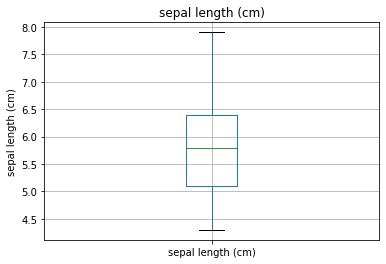

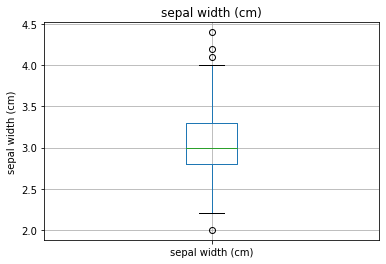

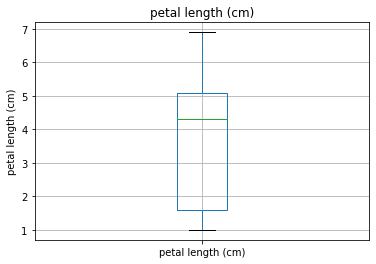

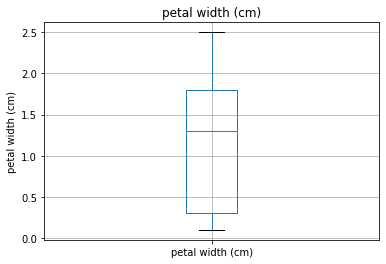

In [12]:
for feature in iris_df:
    if 0 in iris_df[feature].unique():
        pass
    else:
        iris_df.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

Box plots are identifying outliers and for comparing distributions, we can create a box plot to show the median, quartiles, and outlier and extreme values for a variable.

Now, we will detect outlier as well as remove any outlier present in the dataset.

In [13]:
# Detecting the outlier present in the dataset, if any.
def outlier_detect(iris_df):
    for i in iris_df.describe().columns:
        Q1 = iris_df.describe().at['25%',i]
        Q3 = iris_df.describe().at['75%',i]
        IQR = Q3 - Q1
        LTV = Q1-1.5*IQR
        UTV = Q3+1.5*IQR
        iris_df[i]=iris_df[i].mask(iris_df[i]<LTV,LTV)
        iris_df[i]=iris_df[i].mask(iris_df[i]>UTV,UTV)
    return iris_df

In [14]:
iris_df = outlier_detect(iris_df)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
iris_df.isnull().sum()   # Detecting the null values

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [16]:
iris_df.corr()       # Determining the correlation in the data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.119293,0.873738,0.820620
sepal width (cm),-0.119293,1.000000,-0.425425,-0.362030
petal length (cm),0.873738,-0.425425,1.000000,0.962772
petal width (cm),0.820620,-0.362030,0.962772,1.000000


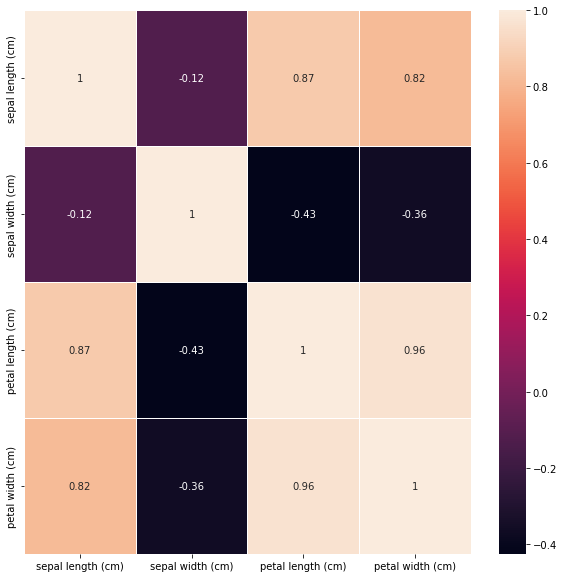

In [21]:
# Heatmap

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(iris_df.corr(), annot=True, linewidth=1)
plt.show()

A heatmap is a two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colours.

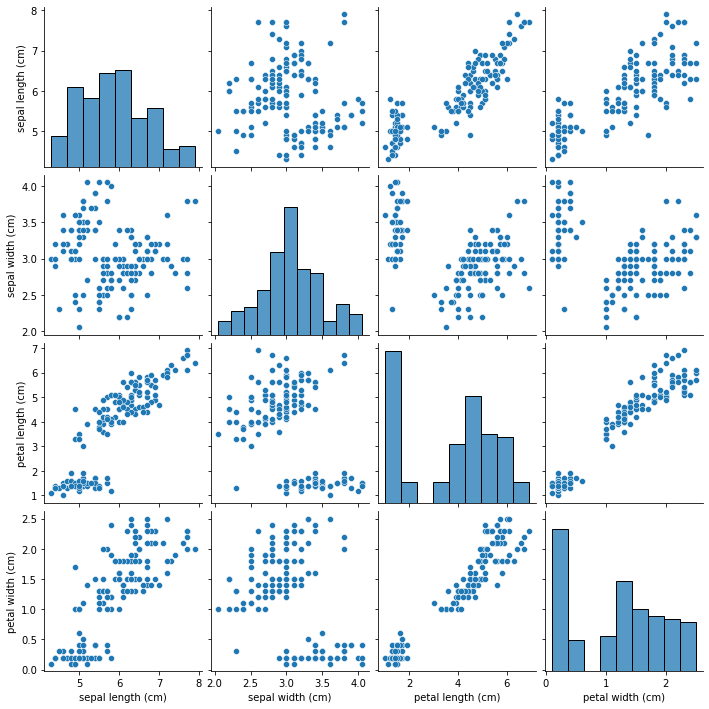

In [22]:
sns.pairplot(iris_df)

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters.<br>
It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

### Finding the optimum number of clusters for k-means classification

C:\Users\NEHAL CHANDRASHEKHAR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


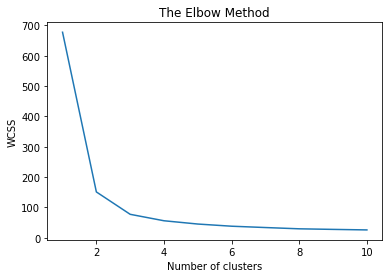

In [23]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                   max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the result with elbow method
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration. <br>
<br>
From this we choose the number of clusters as '3'

In [24]:
# Applying kmeans to the dataset / Creating the kmeans classifier

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
               max_iter = 300, n_init = 10, random_state=0)
y_kmeans = kmeans.fit_predict(x)

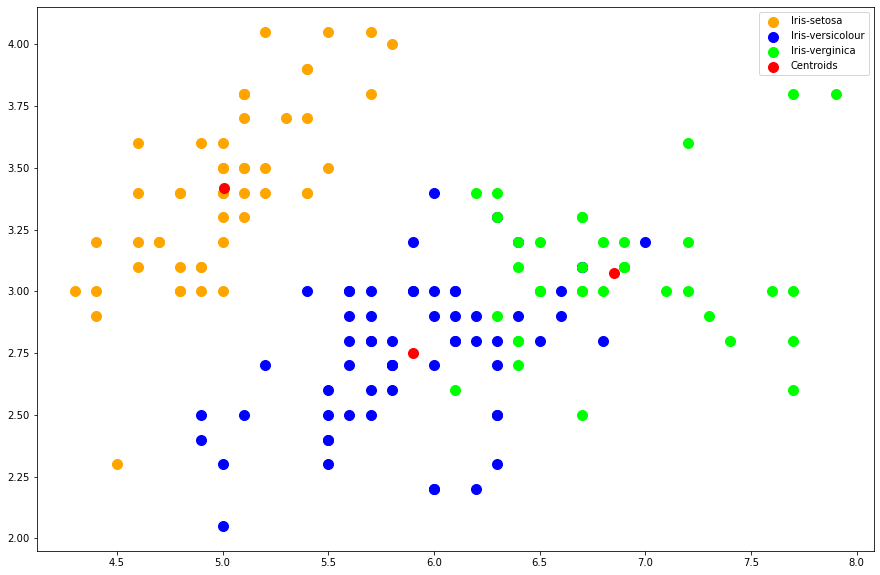

In [26]:
# Visualising the clusters
plt.figure(figsize=(15,10))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],
           s = 100, c = 'orange', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],
           s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
           s = 100, c = 'lime', label = 'Iris-verginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           s = 100, c = 'red', label = 'Centroids')
plt.legend()

This concludes the task-2 K-Means <br>
<br>
Thank you